## Forecasting Models : SMA, WMA, SES, ARIMA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
airline = \
pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [10]:
airline.tail(2)

,Thousands of Passengers
Month,
1960-11-01,390
1960-12-01,432


#### Simple Moving Average

Moving Average 구하는 방법에 대해서는 앞서 rolling mean 을 통해 알아본 바 있습니다.

In [11]:
airline['6M SMA'] = \
airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12M SMA'] = \
airline['Thousands of Passengers'].rolling(window=12).mean()

In [16]:
airline.tail()

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


Thousands of Passengers     0
6M SMA                      5
12M SMA                    11
dtype: int64

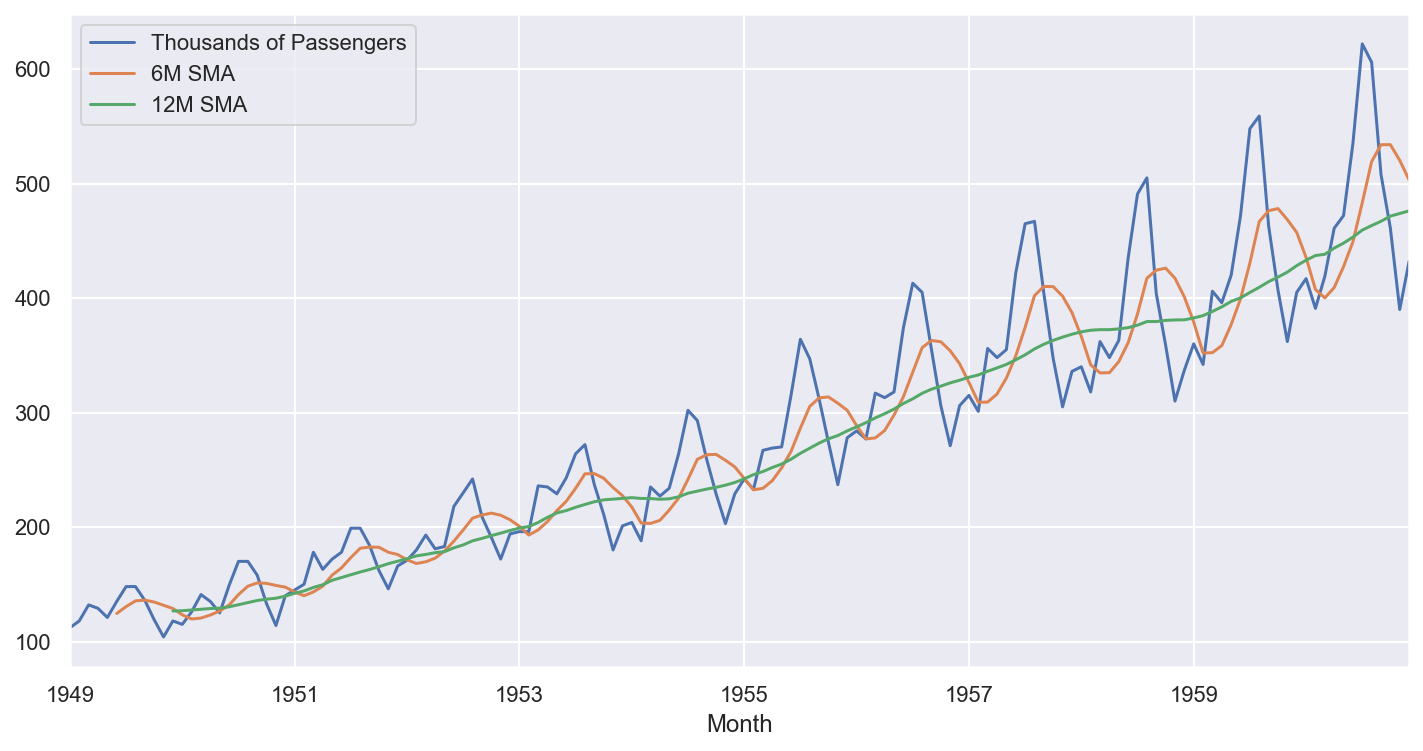

In [17]:
airline.plot(figsize=(12,6))
plt.show()

In [19]:
airline['Thousands of Passengers'] - airline['6M SMA'] #잔차

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01     86.833333
1960-09-01    -26.000000
1960-10-01    -73.000000
1960-11-01   -130.333333
1960-12-01    -71.166667
Length: 144, dtype: float64

In [23]:
# MSE

mean_squared_error(airline['Thousands of Passengers'][:50], airline['6M SMA'].dropna()[:50])

391.69333333333344

#### Weighted Moving Averagem

In [25]:
airline['WMA12'] = \
airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6'] = \
airline['Thousands of Passengers'].ewm(span=6).mean()

In [28]:
airline

,Thousands of Passengers,6M SMA,12M SMA,WMA12,WMA6
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,115.500000
1949-03-01,132,NaN,NaN,121.787529,122.917431
1949-04-01,129,NaN,NaN,124.064224,125.266892
1949-05-01,121,NaN,NaN,123.231685,123.769332
...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620,538.549357
1960-09-01,508,534.000000,467.083333,496.914217,529.820969
1960-10-01,461,534.000000,471.583333,491.388952,510.157835


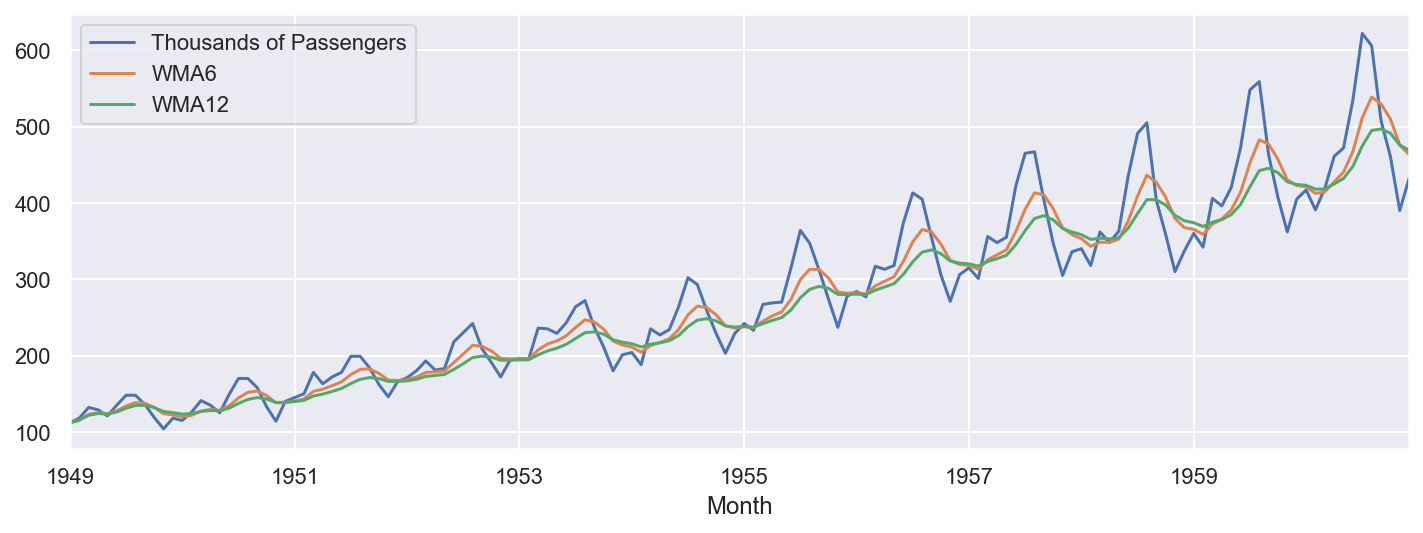

In [30]:
airline[['Thousands of Passengers', 'WMA6','WMA12']].plot(figsize=(12,4))
plt.show()

#### Simple Exponential Smoothing

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [33]:
train = airline[:'1959']
test = airline['1960':]

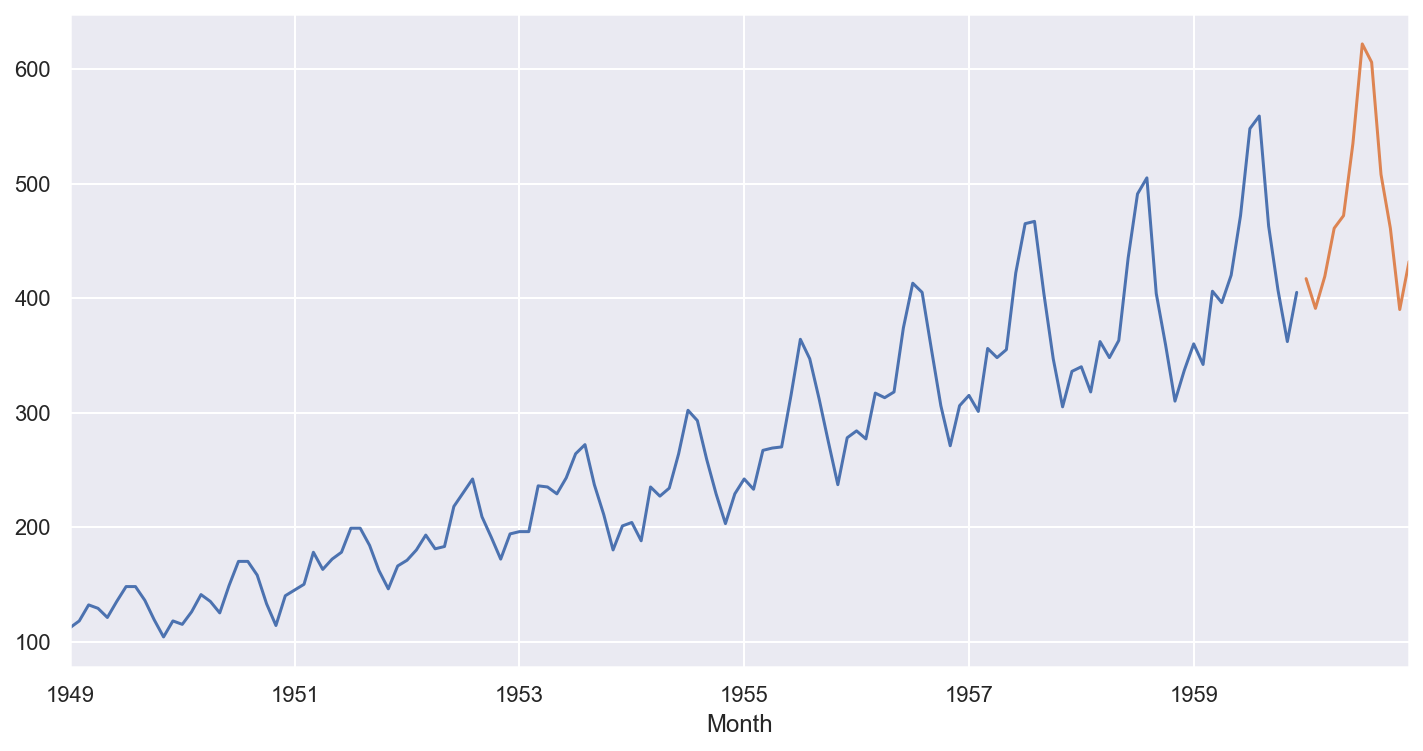

In [37]:
train['Thousands of Passengers'].plot(figsize=(12,6))
test['Thousands of Passengers'].plot()

In [41]:
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [42]:
ses_result = ses_model.fit() # train 데이터 학습

In [44]:
y_hat = test.copy()

In [47]:
y_hat['SES'] = ses_result.forecast(len(test)) # test 데이터 검증

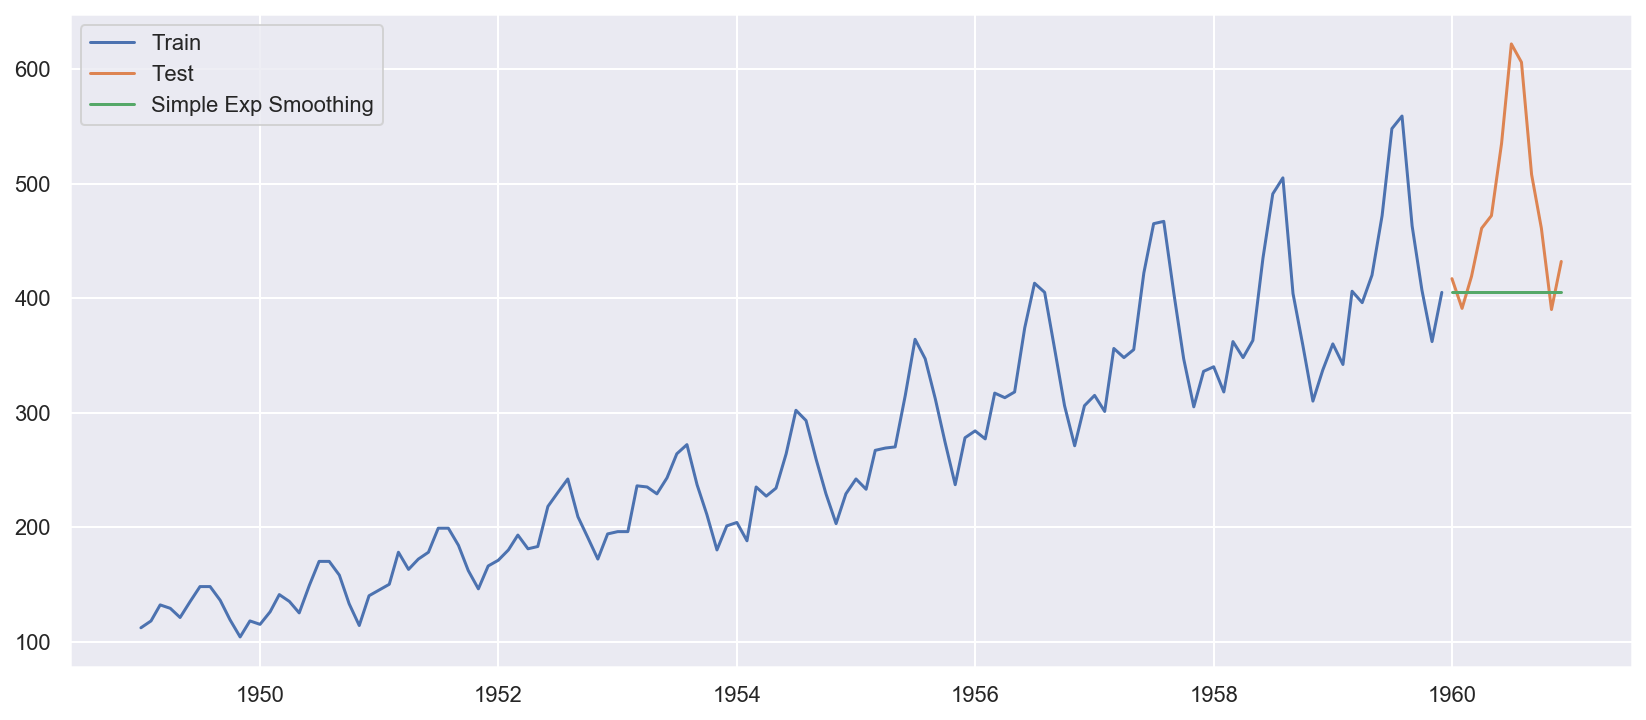

In [51]:
plt.figure(figsize=(14,6))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')

plt.legend()
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))
rmse

102.97653454387881

#### Holt's Method - Trend 경향 반영

In [61]:
from statsmodels.tsa.api import Holt

In [62]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [63]:
holt_result = holt_model.fit()

In [66]:
y_hat['HOLT'] = holt_result.forecast(len(test))
y_hat.tail(2)

,Thousands of Passengers,6M SMA,12M SMA,WMA12,WMA6,SES,HOLT
Month,,,,,,,
1960-11-01,390,520.333333,473.916667,475.790652,475.827025,405.0,429.602839
1960-12-01,432,503.166667,476.166667,469.053629,463.305018,405.0,431.839461


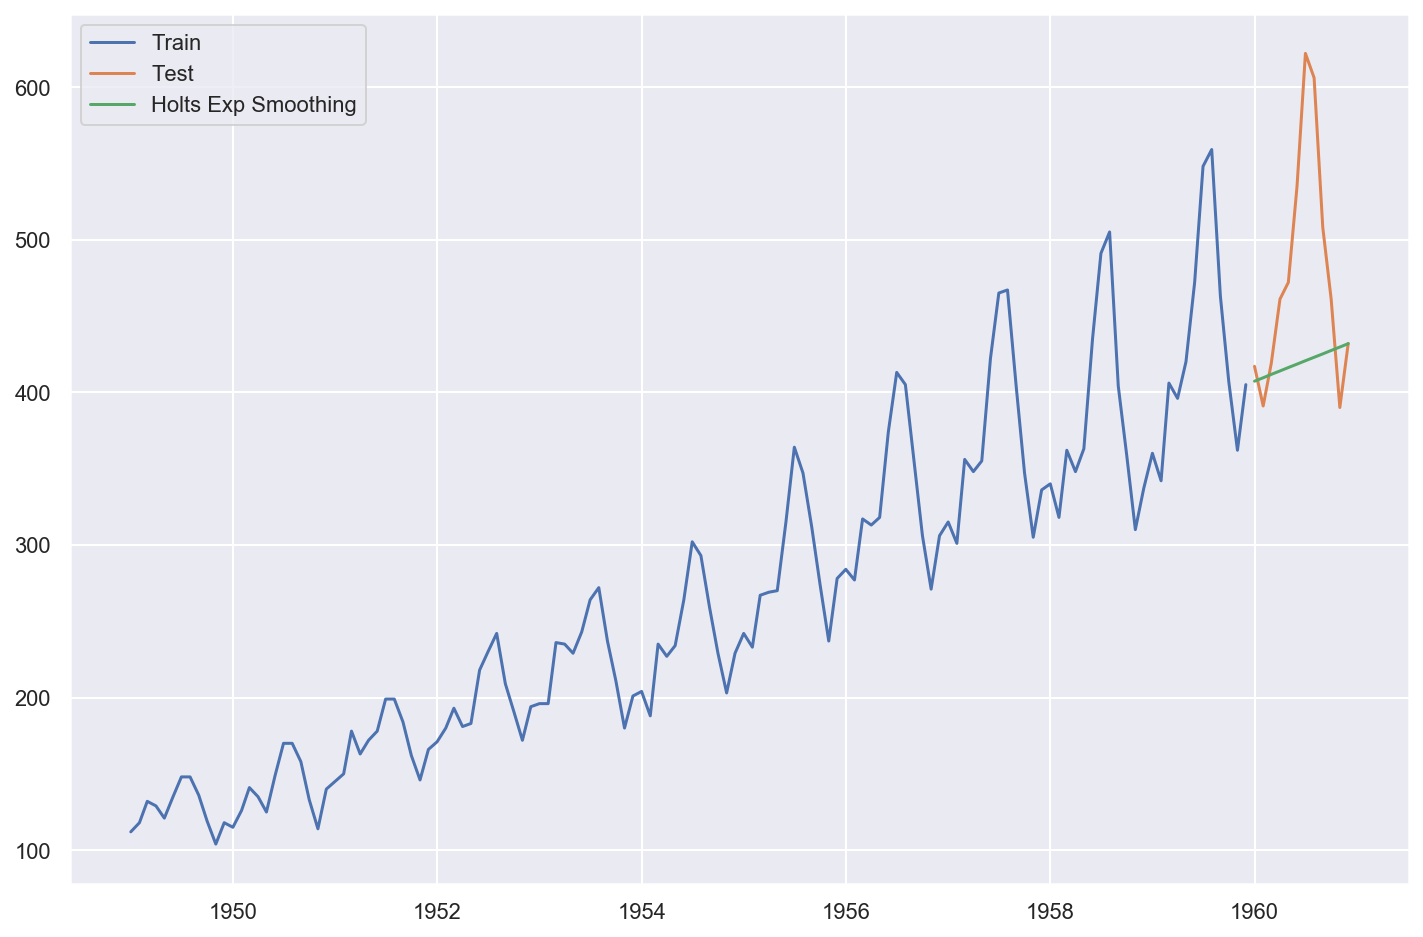

In [67]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts Exp Smoothing')
plt.legend()

In [68]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))

In [69]:
rmse

92.6664454018816

#### Holt-Winters Method - Trend + Seasonality 경향도 반영

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing

In [71]:
winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend='add', seasonal='add'
)

In [83]:
# %%time
winter_result = winter_model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [84]:
y_hat['WINTER'] = winter_result.forecast(len(test))

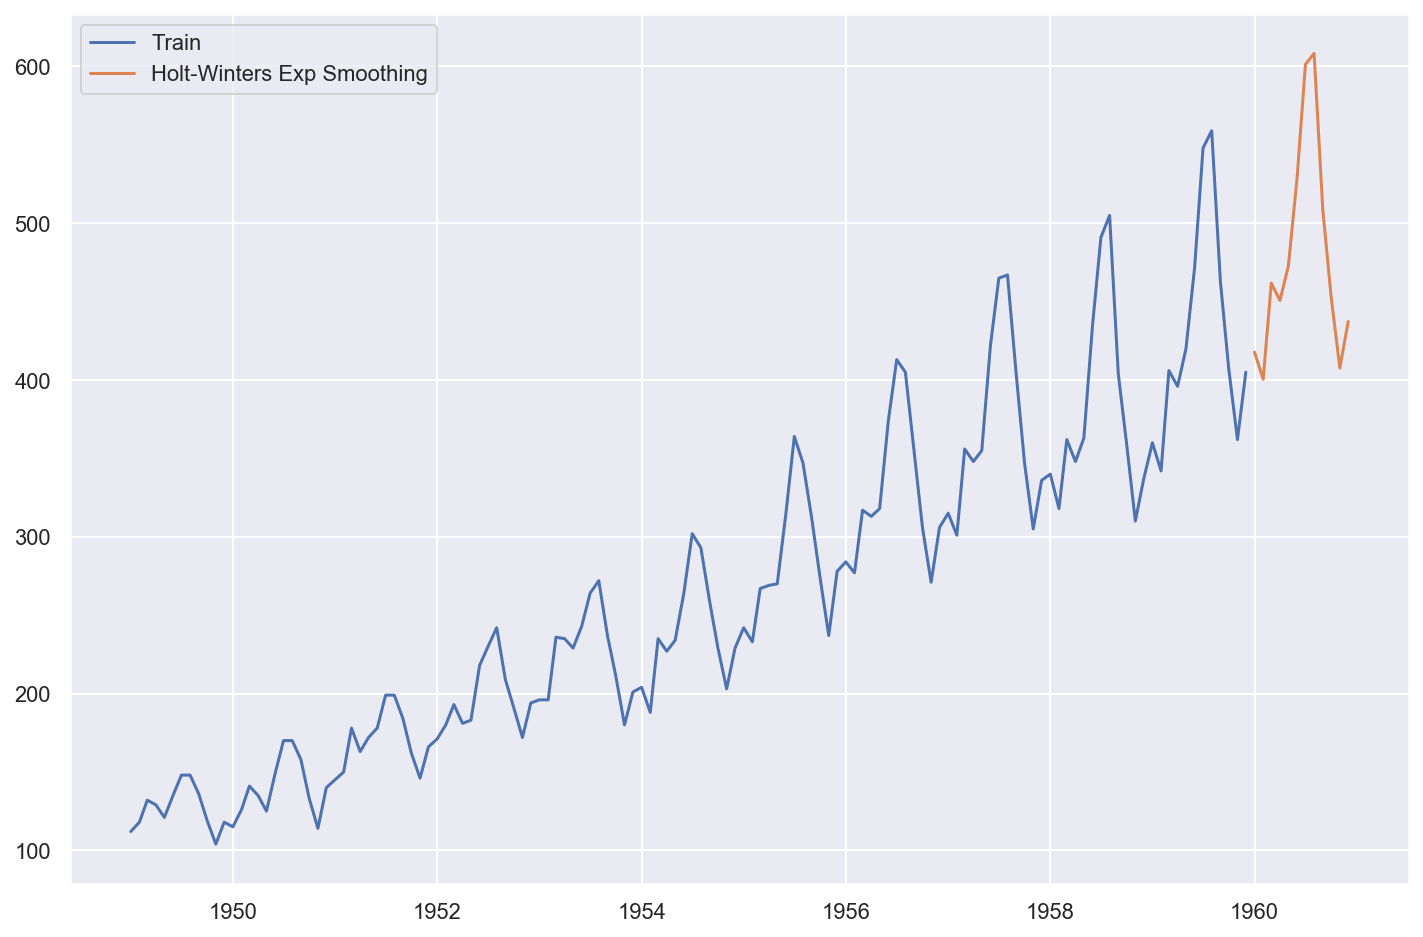

In [85]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
# plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holt-Winters Exp Smoothing')
plt.legend()

In [88]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))
rmse

15.570830855326424

#### ARIMA

In [78]:
import statsmodels.api as sm

In [93]:
# ARIMA(p,d,q)(P,D,Q)m 
# 3개에서 7개까지 들어감
# 만약에 seasonality 경향이 뚜렷하다면 (P,D,Q)m 까지 들어감 (trend 경향만 있으면 (p,d,q)만)
arima = sm.tsa.statespace.SARIMAX(train['Thousands of Passengers'],
                         order=(2,1,1),
                         seasonal_order=(0,1,0,12),
                         enforce_stationary=False,
                         enforce_invertibility=False) # 맨 마지막 12는 1년 12달


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [94]:
arima_result = arima.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [114]:
y_hat['ARIMA'] = arima_result.predict(start='1960-01-01', end='1960-12-01', dynamic=True)

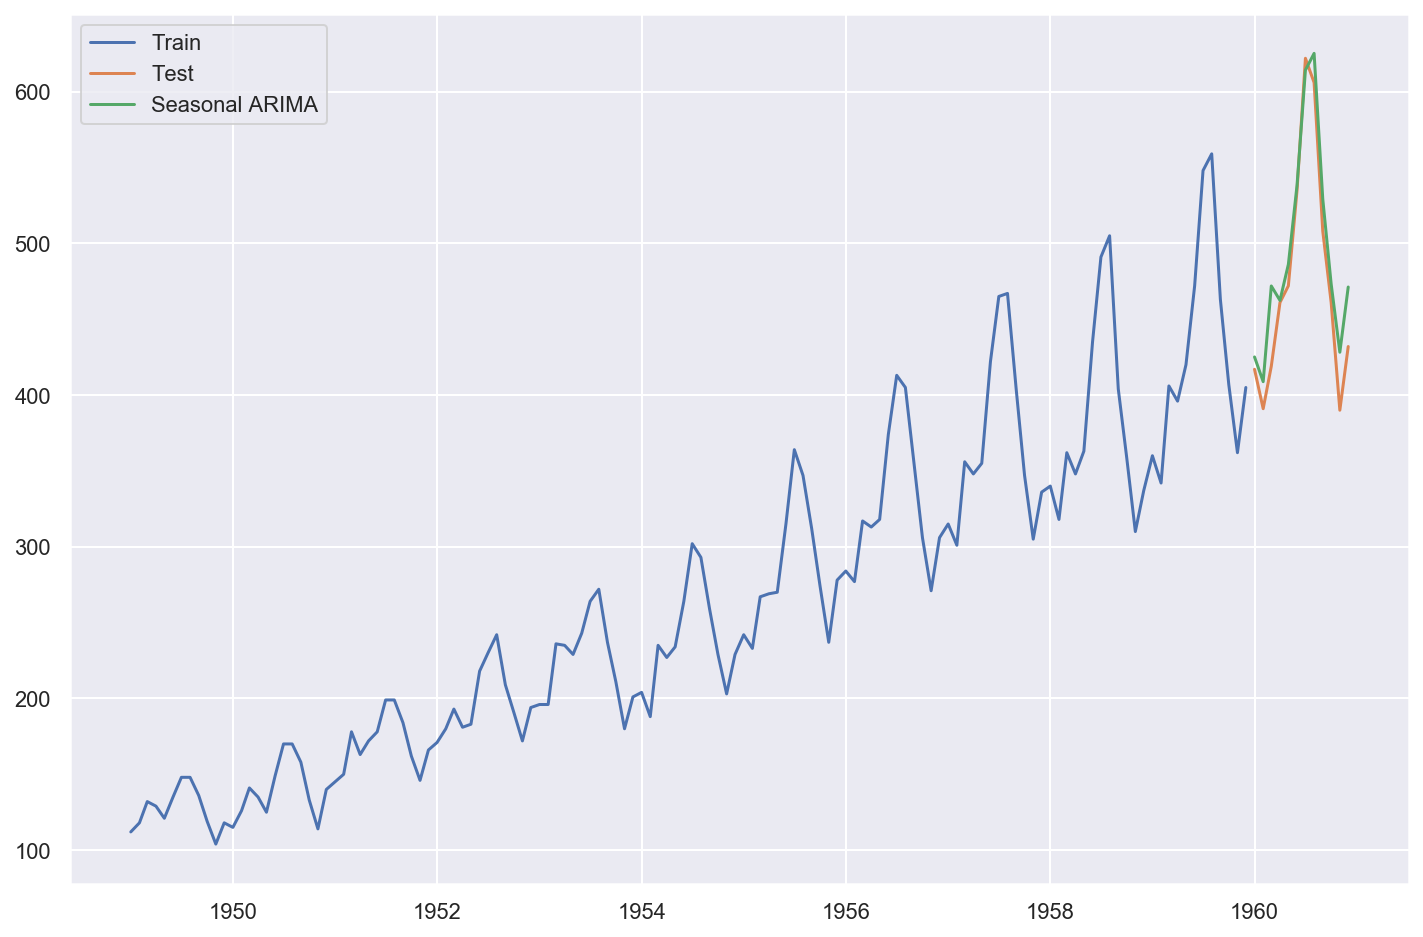

In [115]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [110]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['ARIMA']))

In [113]:
rmse

24.874320997975687